In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram
from qiskit.compiler import transpile
from qiskit_aer import AerSimulator
import numpy as np

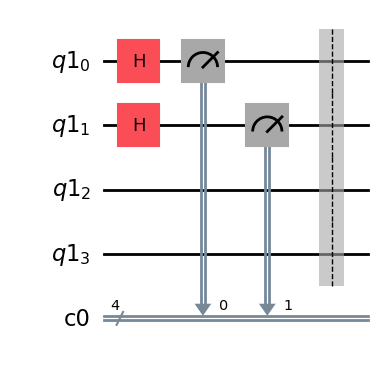

In [2]:
q_reg = QuantumRegister(4)
c_reg = ClassicalRegister(4)
q_ckt = QuantumCircuit(q_reg, c_reg)

# RNG for Alice
q_ckt.h(q_reg[0])
q_ckt.h(q_reg[1])
q_ckt.measure(q_reg[0], c_reg[0])
q_ckt.measure(q_reg[1], c_reg[1])
q_ckt.barrier()
q_ckt.draw(output='mpl')

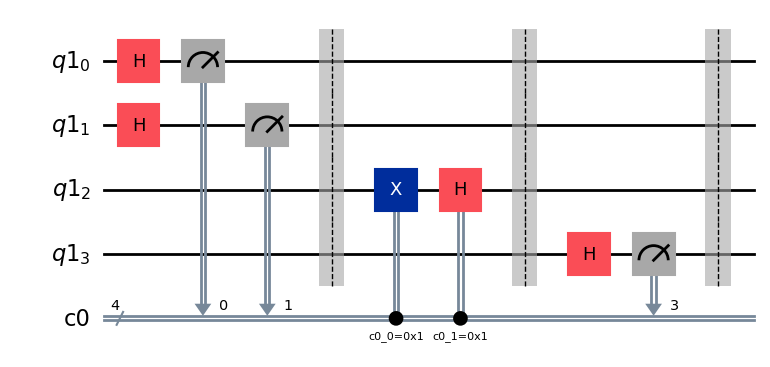

In [3]:
# State preparation at Alice
q_ckt.x(q_reg[2]).c_if(c_reg[0] ,1)
q_ckt.h(q_reg[2]).c_if(c_reg[1] ,1)
q_ckt.barrier()

# RNG for Bob
q_ckt.h(q_reg[3])
q_ckt.measure(q_reg[3], c_reg[3])
q_ckt.barrier()
q_ckt.draw(output='mpl')

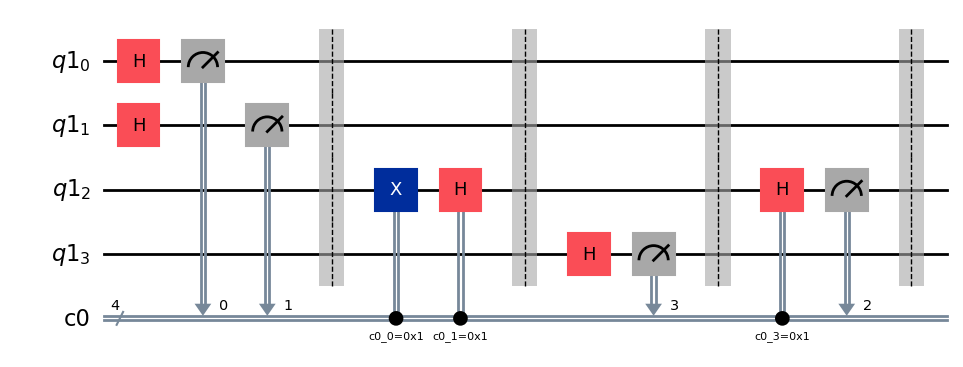

In [4]:
# bob's measure circuit
q_ckt.h(q_reg[2]).c_if(c_reg[3] ,1)
q_ckt.measure(q_reg[2], c_reg[2])
q_ckt.barrier()
q_ckt.draw(output='mpl')

In [5]:
N = 4
for i in range(N):
  a_bit, b_bit = [], []
  a_basis, b_basis = [], []

  # post proc
  result = AerSimulator().run(q_ckt, shots=1, memory=True).result()
  memory = result.get_memory()[0]

  a_bit.append(int(memory[0]))
  a_basis.append(int(memory[1]))
  b_bit.append(int(memory[2]))
  b_basis.append(int(memory[3]))

  print(a_bit, a_basis, b_bit, b_basis)

[0] [0] [0] [0]
[0] [1] [1] [0]
[1] [1] [1] [1]
[1] [0] [0] [1]


In [6]:
e = 0
for i in range(N):
  if a_basis[0] == b_basis[0]:
    # print(f"Error: {a_bit[0]^b_bit[0]}")
    e += a_bit[0]^b_bit[0]

print(f"Error rate: {e/N}")

Error rate: 0.0
